### Imports

In [1]:
import datetime
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## for plotting
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
## for explainer
from lime import lime_tabular
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')

## **Import of the database and visualizations**

In [2]:
df = pd.read_csv('final.csv', sep=',')

In [3]:
df.shape

(12708, 16)

In [6]:
df.nunique()

Sets                                      2
Seasons_Encoded                           4
GameRoundFases_Encoded                    4
Encoded_Age_Difference_Interval           5
Encoded_Ranking_Difference_Interval       5
Encoded_Height_Difference_Interval        5
TieBreak                                  2
Tournament_Encoded                        5
PlayerName_RecentPerformance_Encoded      2
Oponent_RecentPerformance_Encoded         2
H2H_Encoded                               2
TimeDifference_Interval_Encoded           4
Present_Prize                           132
Prize_Intervals_Encoded                   7
PointDiff                                 2
Age_Difference                           25
dtype: int64

Sets                                      2
TieBreak                                  2
PlayerName_RecentPerformance_Encoded      2
Oponent_RecentPerformance_Encoded         2
H2H_Encoded                               2
PointDiff                                 2
Seasons_Encoded                           4
GameRoundFases_Encoded                    4
TimeDifference_Interval_Encoded           4
Encoded_Age_Difference_Interval           5
Encoded_Ranking_Difference_Interval       5
Encoded_Height_Difference_Interval        5
Tournament_Encoded                        5
Prize_Intervals_Encoded                   7
Age_Difference                           25
Present_Prize                           132
dtype: int64


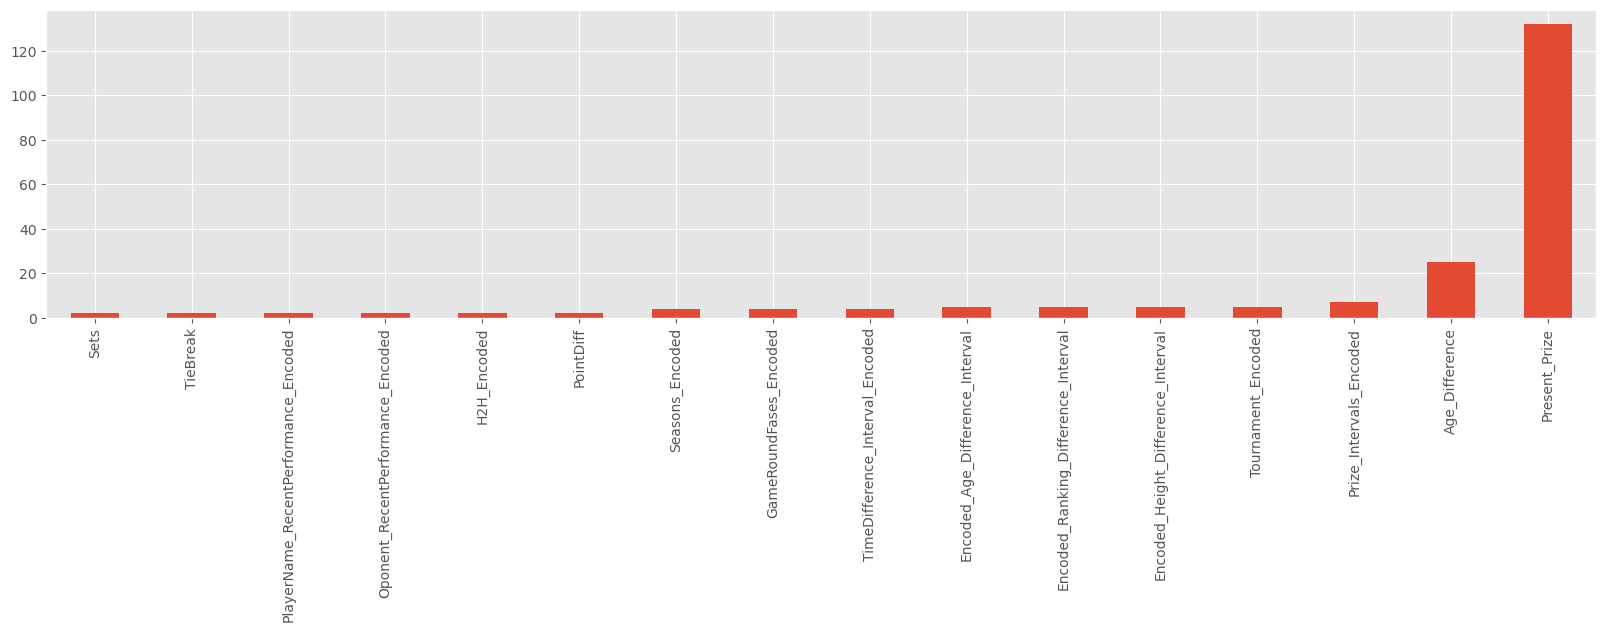

In [14]:
unique_values = df.nunique().sort_values()
print(unique_values)
unique_values.plot.bar(logy=False, figsize=(20, 4), title="");

In [4]:
df.head()

,Sets,Seasons_Encoded,GameRoundFases_Encoded,Encoded_Age_Difference_Interval,Encoded_Ranking_Difference_Interval,Encoded_Height_Difference_Interval,TieBreak,Tournament_Encoded,PlayerName_RecentPerformance_Encoded,Oponent_RecentPerformance_Encoded,H2H_Encoded,TimeDifference_Interval_Encoded,Present_Prize,Prize_Intervals_Encoded,PointDiff,Age_Difference
0,2,0,1,1,1,1,0,2,1,1,0,3,3456652.8,5,1,5.0
1,2,0,0,1,1,1,0,3,1,1,0,1,5370745.6,5,0,5.0
2,2,0,1,1,1,1,0,2,1,1,0,2,3200601.6,5,1,2.0
3,2,0,0,4,1,1,0,3,1,1,0,1,4661712.0,5,0,9.0
4,2,0,1,1,1,1,0,3,1,1,0,1,4661712.0,5,0,2.0


### Variable **Sets**

In [5]:
absolute_freq = df['Sets'].value_counts()

relative_freq = df['Sets'].value_counts(normalize=True)

print('Absolute Frequency:')
print(absolute_freq)

print('Relative Frequency:')
print(relative_freq)

Absolute Frequency:
2    9217
3    3491
Name: Sets, dtype: int64
Relative Frequency:
2    0.725291
3    0.274709
Name: Sets, dtype: float64


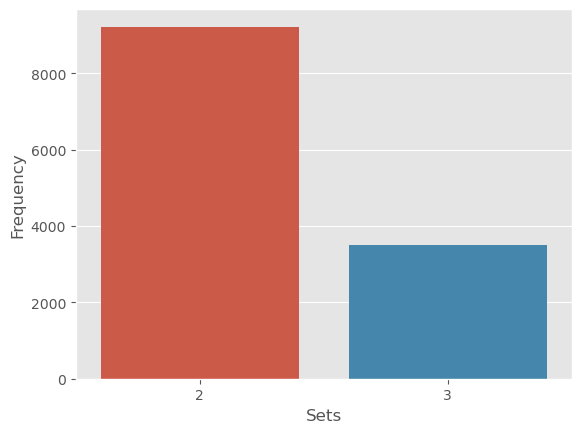

In [6]:
sns.countplot(data=df, x='Sets')
plt.xlabel('Sets')
plt.ylabel('Frequency')
plt.title('')

# Save the plot
plt.savefig('figs/absolute_frequency_sets.png')

# Display the plot
plt.show()

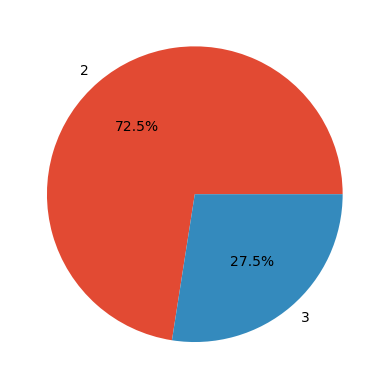

In [7]:
counts = df['Sets'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('')

# Save the plot
plt.savefig('figs/relative_frequency_sets.png')

# Display the plot
plt.show()

A partir deste output podemos observar que a base de dados se encontra muito desbalanceada. 

De seguida vamos fazer modelos com a base de dados original, e vamos também tentar corrigir o probelma do desbalanceamento dos dados. Para existo existem algumas formas de o fazer:
- Stratified Sampling
- Oversampling
- Undersampling

### Rest of the variables - Categorical

In [18]:
categorical_vars = ['Sets', 
                    'Seasons_Encoded', 
                    'GameRoundFases_Encoded',
                    'Encoded_Age_Difference_Interval',
                    'Encoded_Ranking_Difference_Interval',
                    'Encoded_Height_Difference_Interval', 
                    'TieBreak', 
                    'Tournament_Encoded',
                    'PlayerName_RecentPerformance_Encoded',
                    'Oponent_RecentPerformance_Encoded', 
                    'H2H_Encoded',
                    'Prize_Intervals_Encoded',
                    'PointDiff']

#### Bar Plots

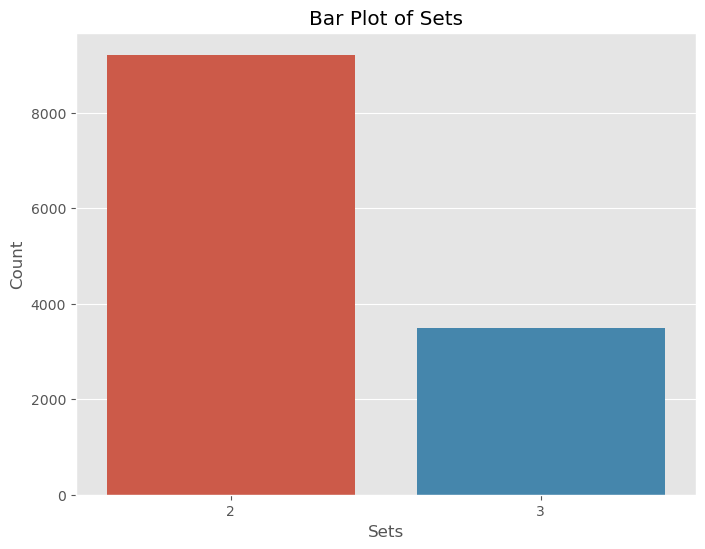

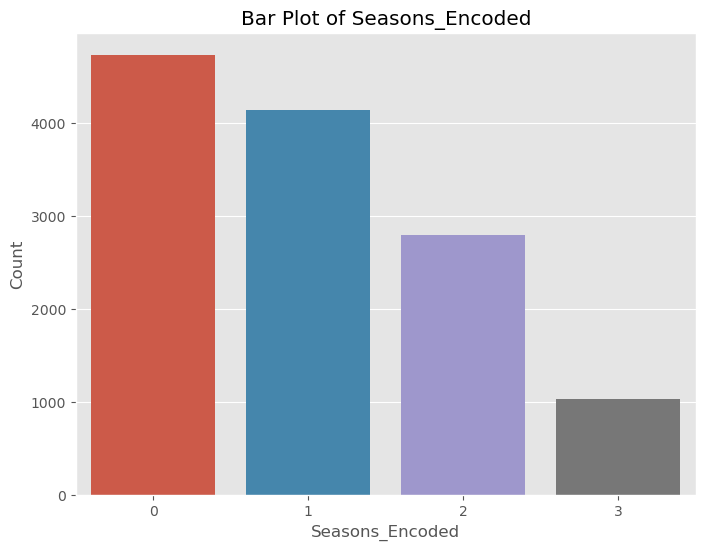

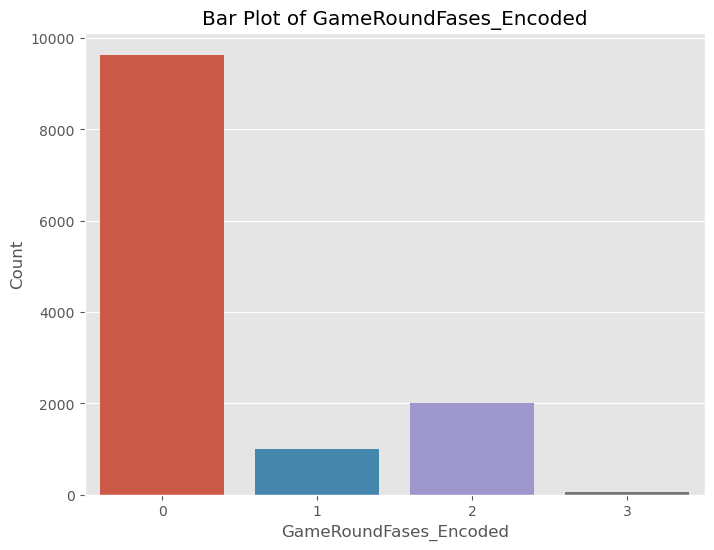

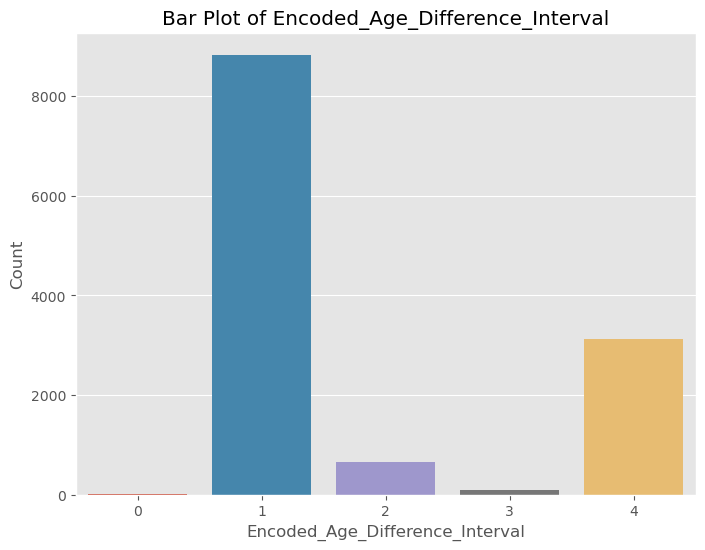

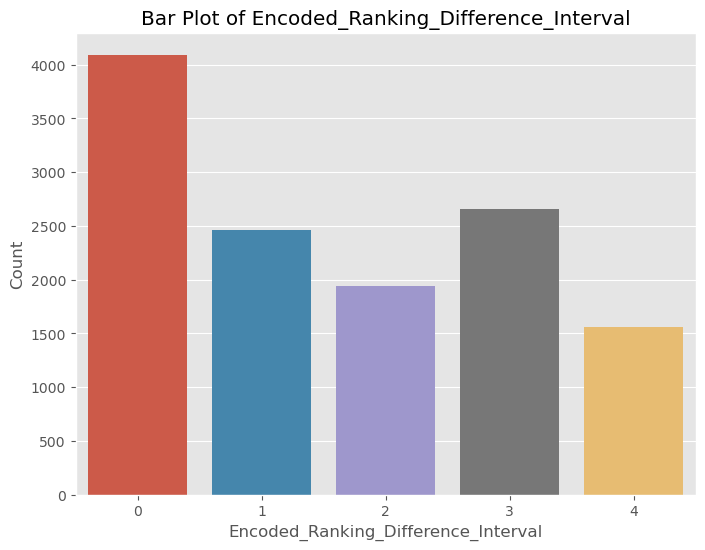

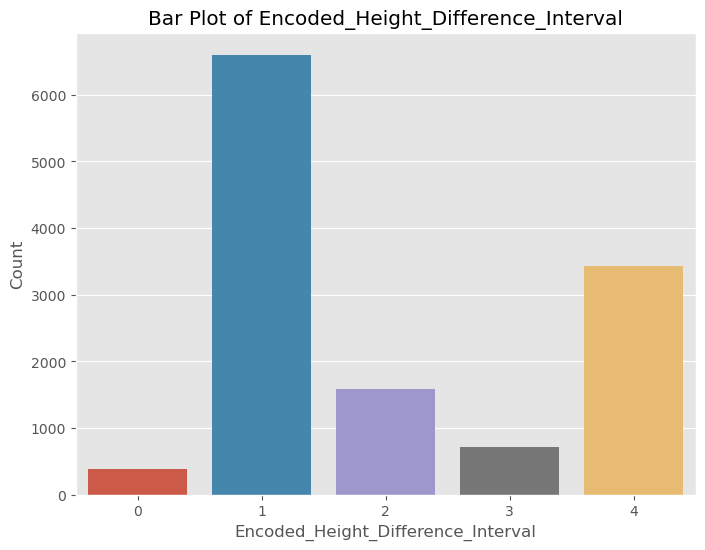

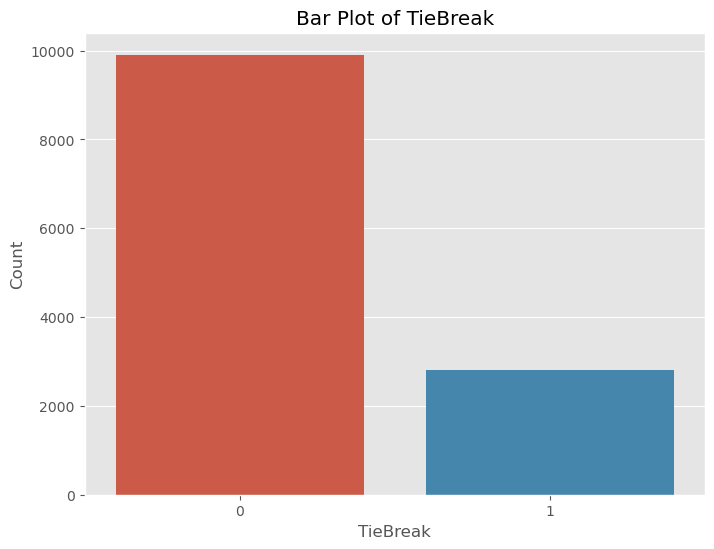

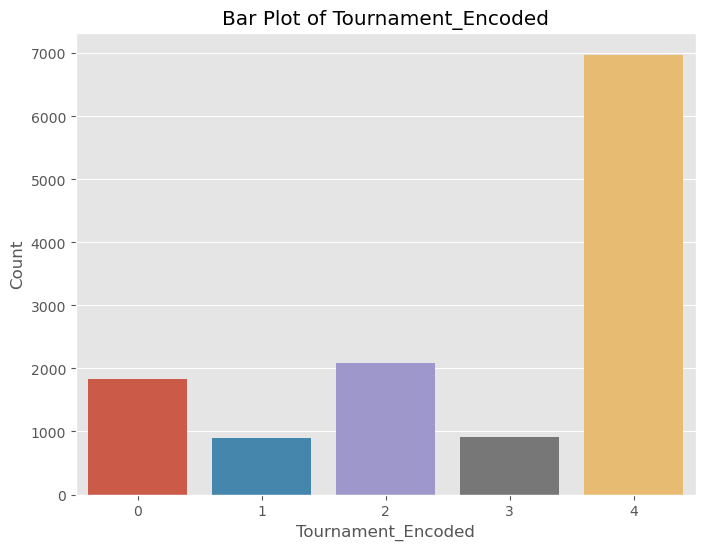

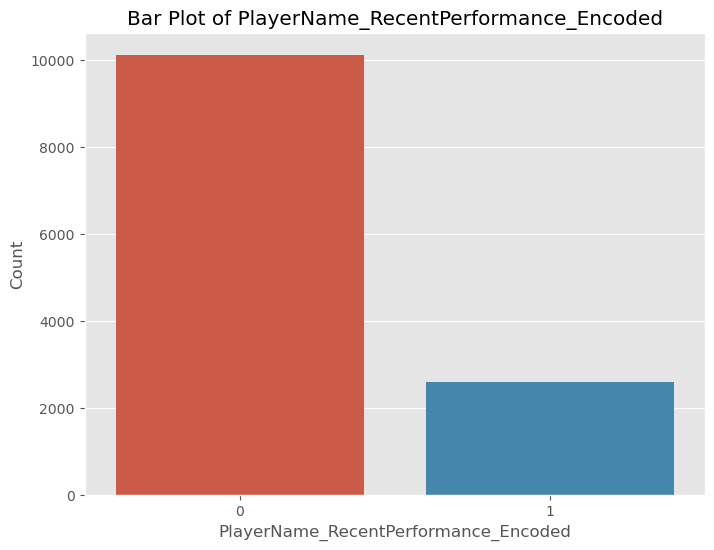

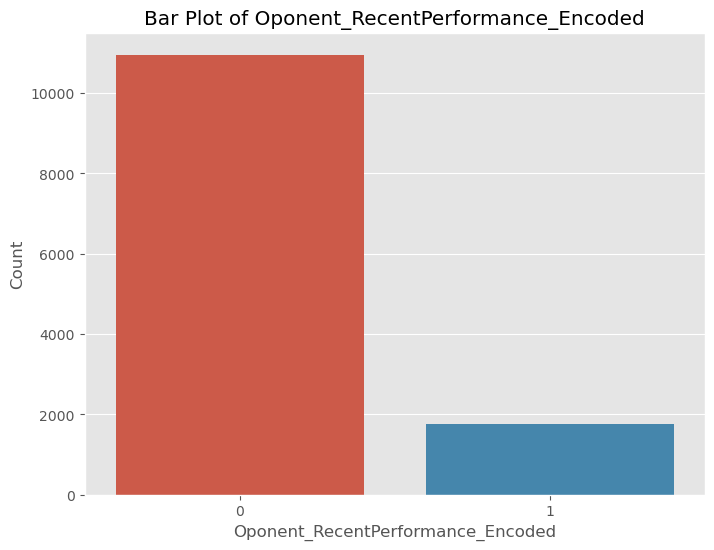

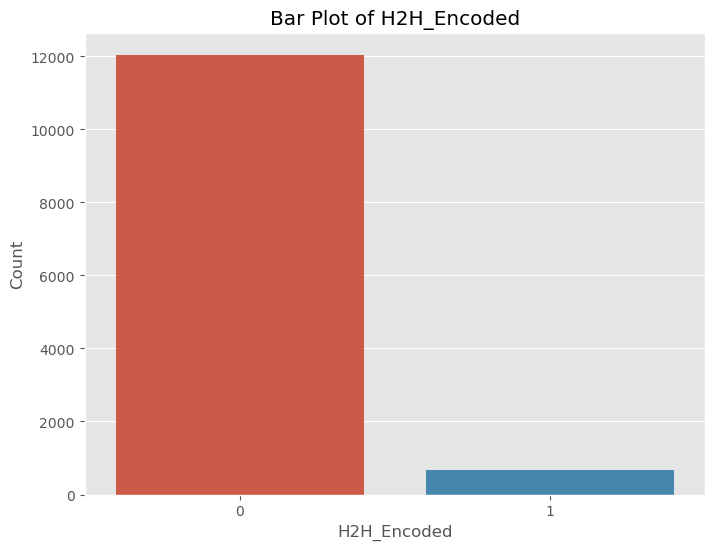

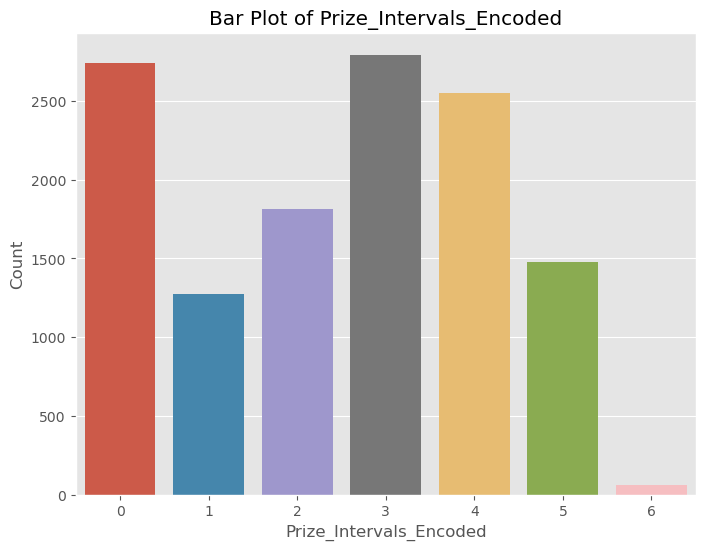

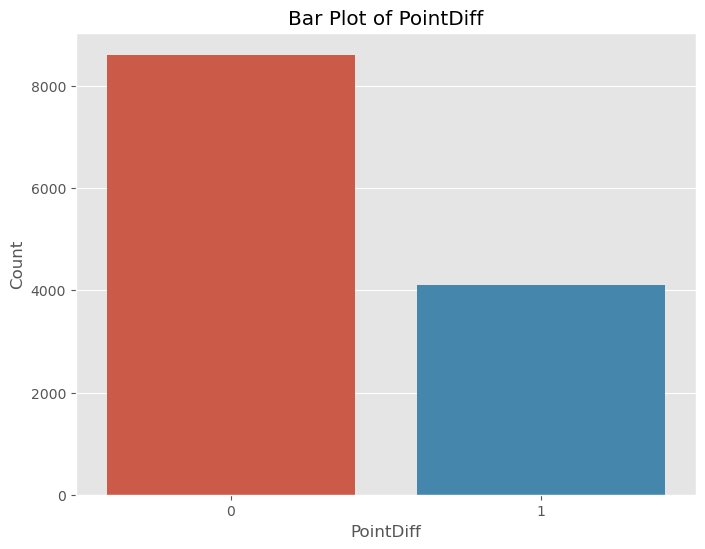

In [20]:
# Bar Plot
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[var])
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

#### PieChart

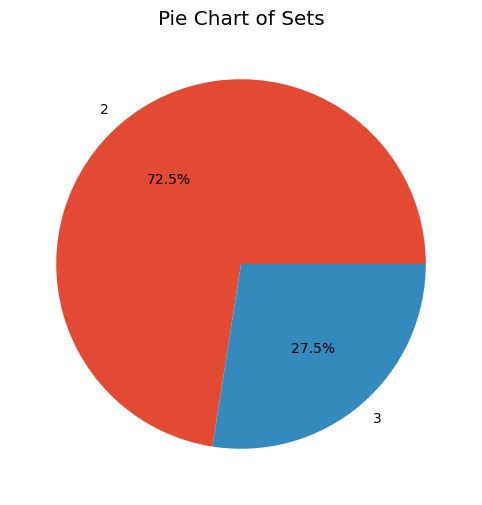

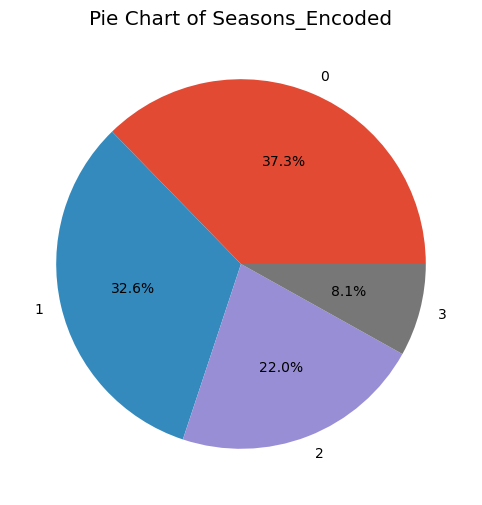

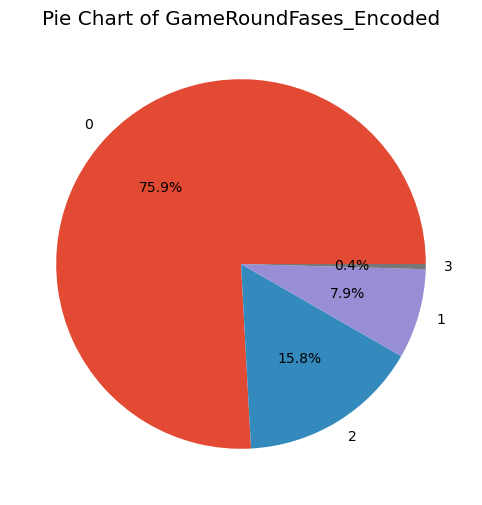

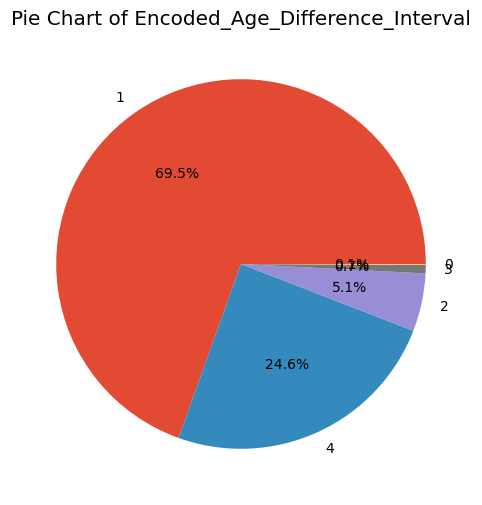

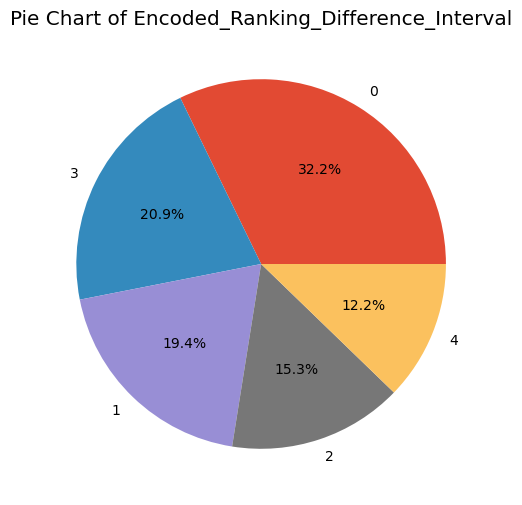

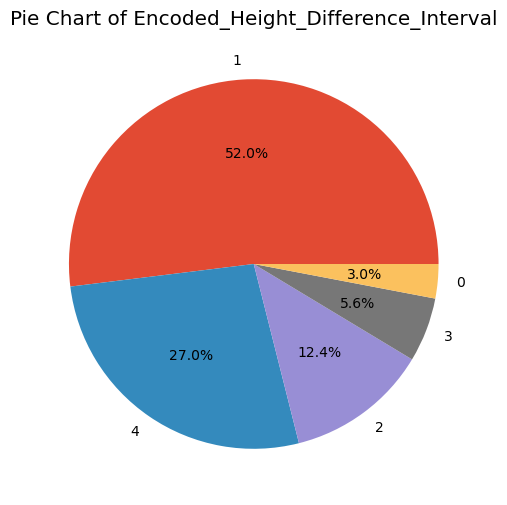

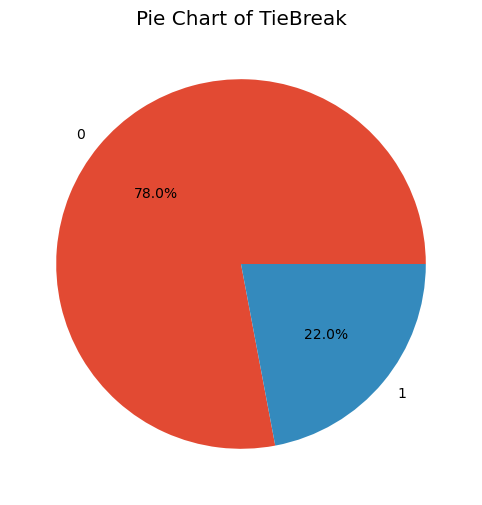

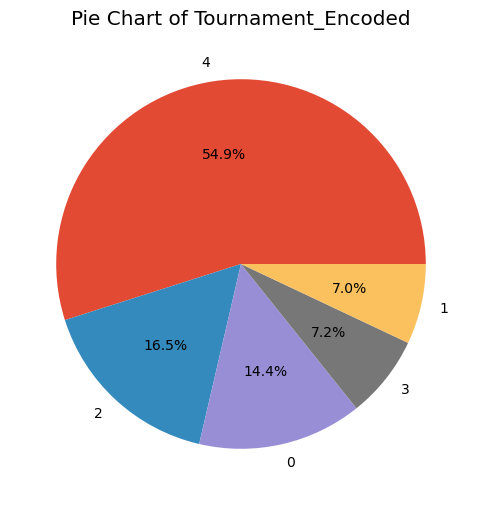

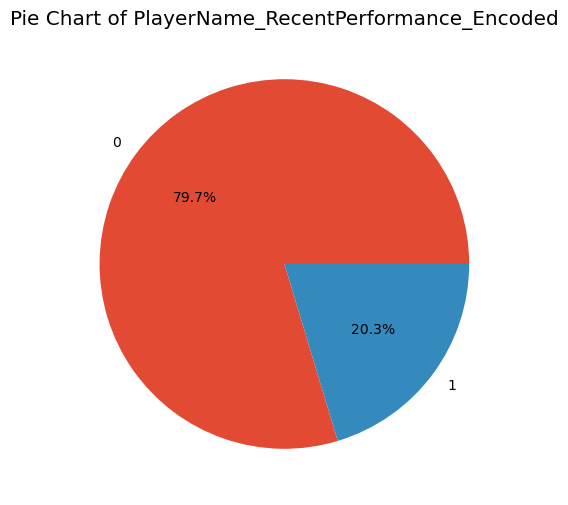

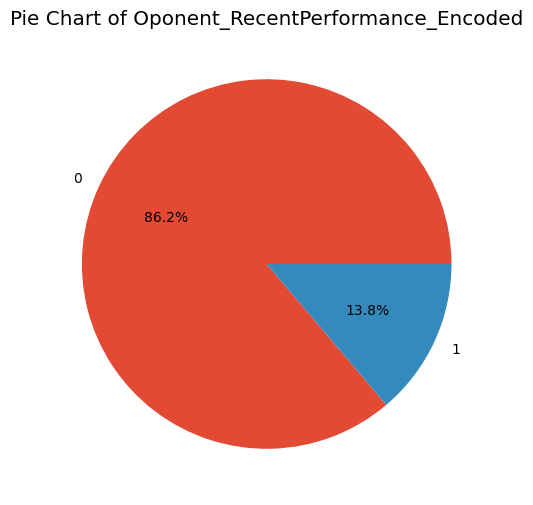

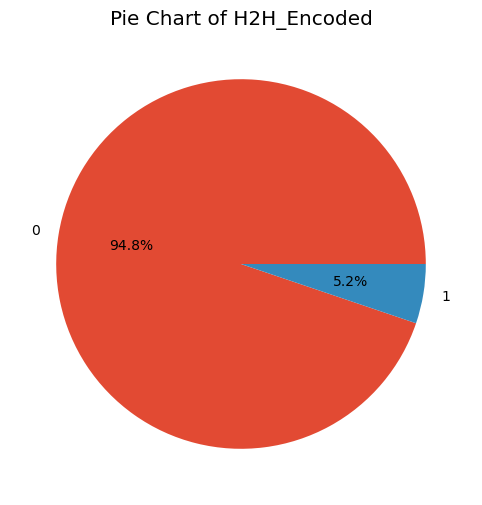

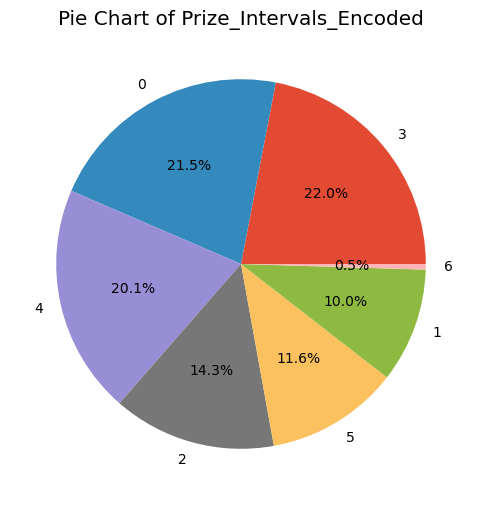

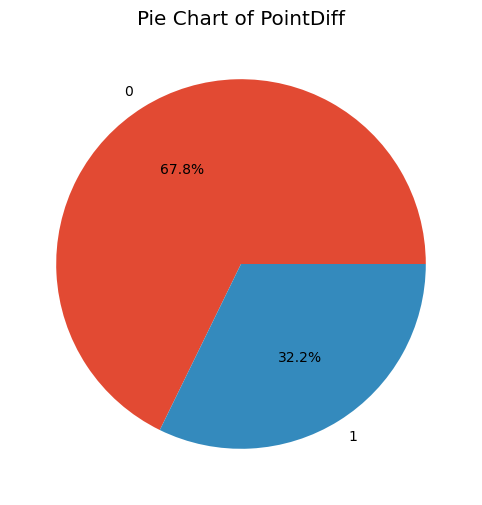

In [21]:
# Pie Chart
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {var}')
    plt.ylabel('')
    plt.show()

### Rest of the variables - Numerical

In [23]:
numerical_vars = ['TimeDifference_Interval_Encoded', 
               'Present_Prize',
               'Age_Difference']

#### Histogram

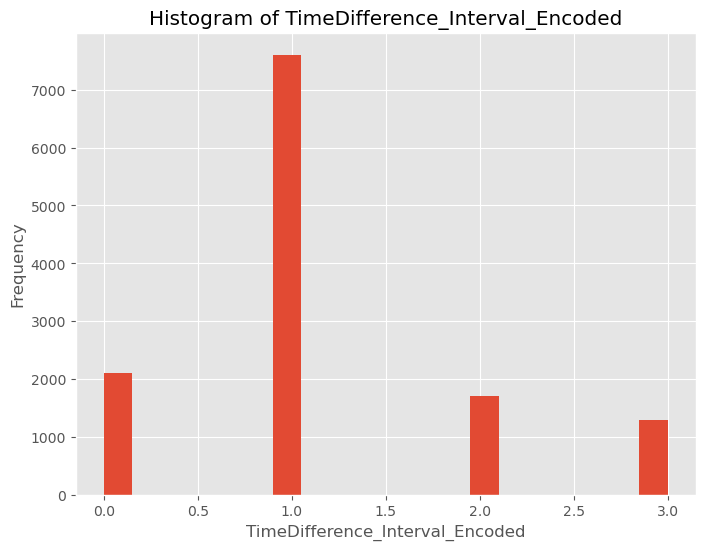

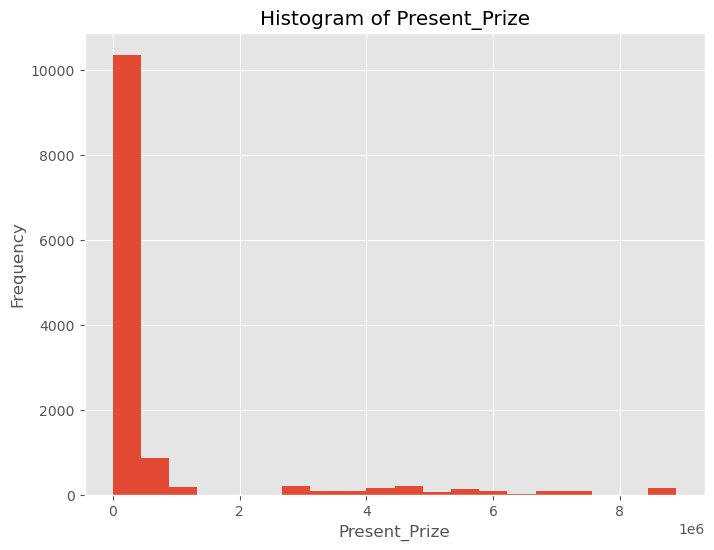

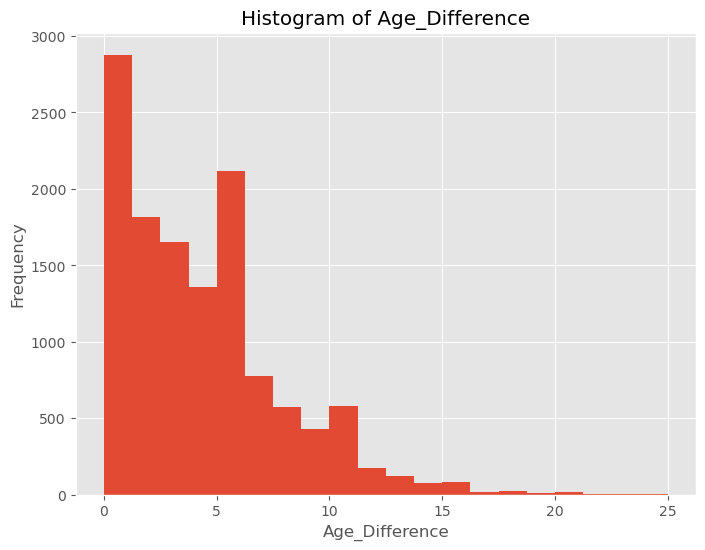

In [24]:
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(df[var], bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

#### Box Plot

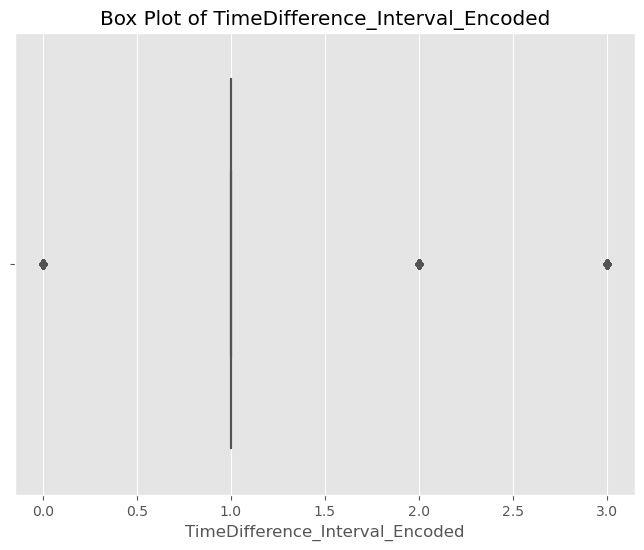

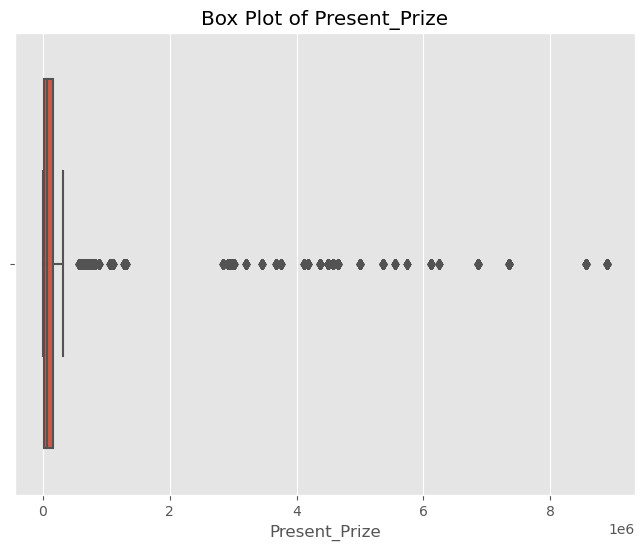

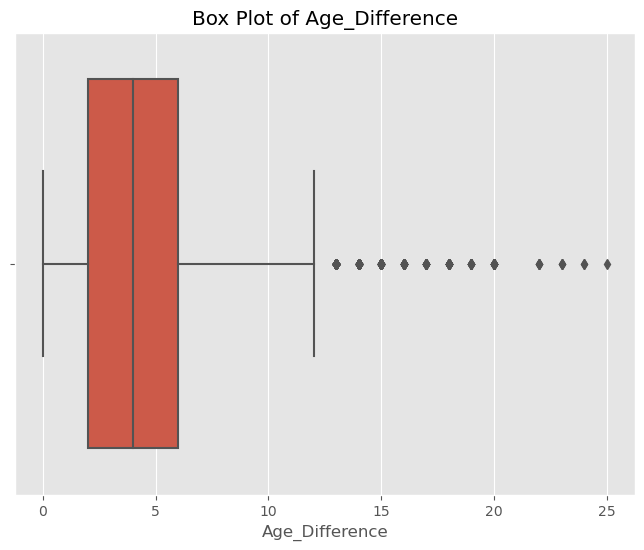

In [25]:
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

#### Scatter Plot

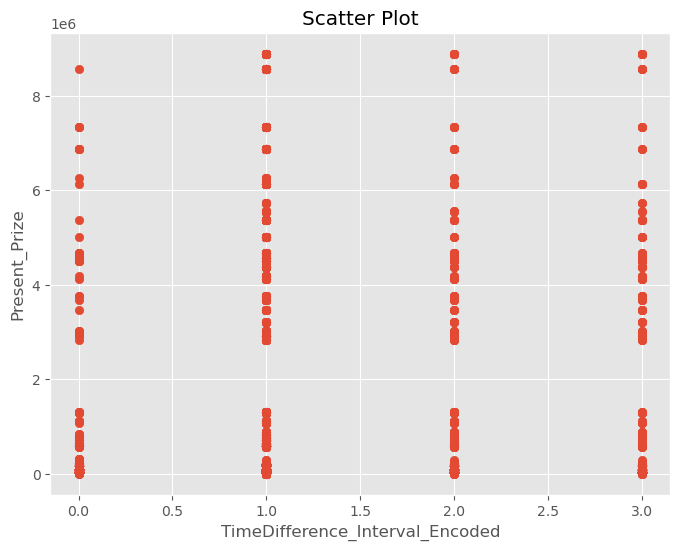

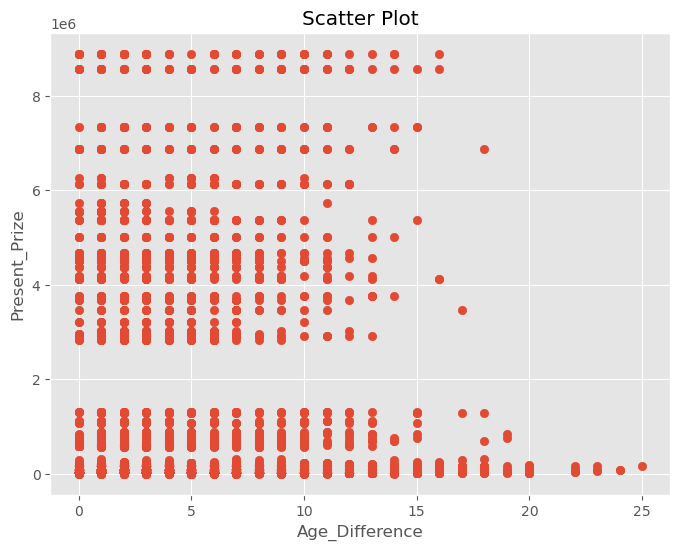

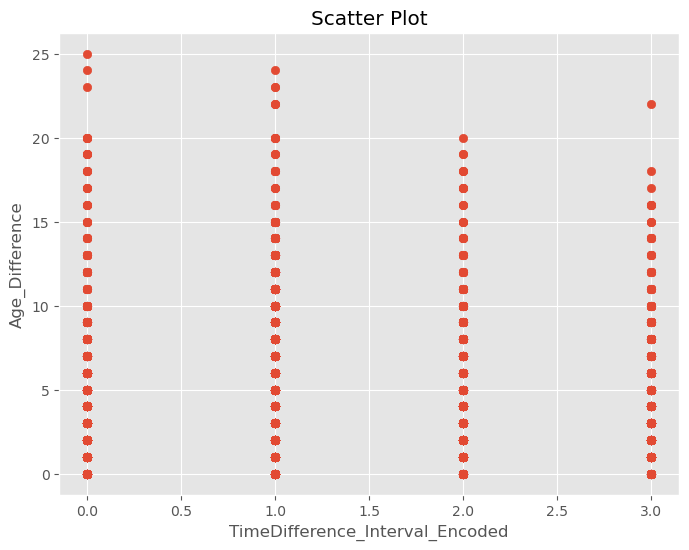

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TimeDifference_Interval_Encoded'], df['Present_Prize'])
plt.title('Scatter Plot')
plt.xlabel('TimeDifference_Interval_Encoded')
plt.ylabel('Present_Prize')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Age_Difference'], df['Present_Prize'])
plt.title('Scatter Plot')
plt.xlabel('Age_Difference')
plt.ylabel('Present_Prize')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['TimeDifference_Interval_Encoded'], df['Age_Difference'])
plt.title('Scatter Plot')
plt.xlabel('TimeDifference_Interval_Encoded')
plt.ylabel('Age_Difference')
plt.show()

#### Pair Plot

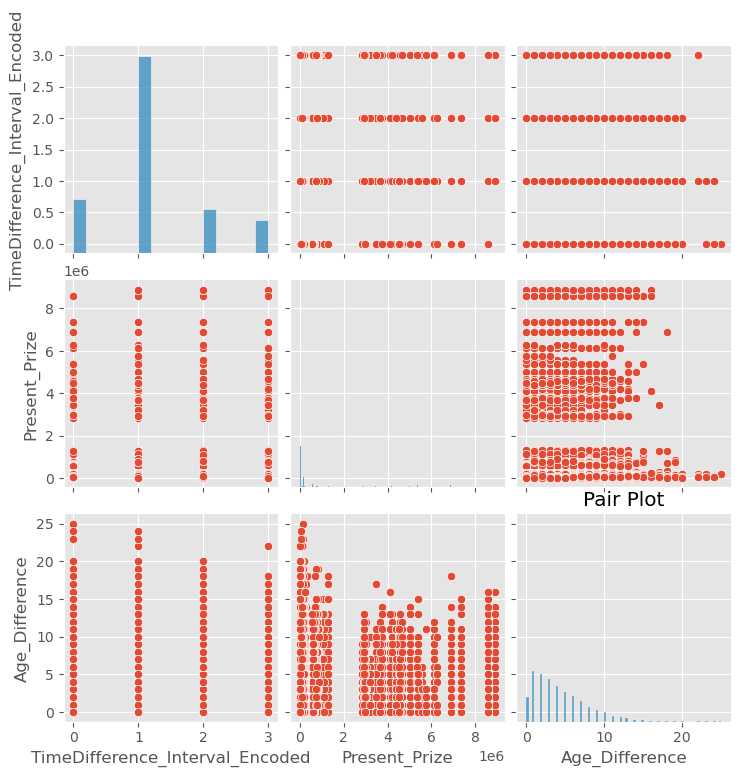

In [30]:
sns.pairplot(df[numerical_vars])
plt.title('Pair Plot')
plt.show()

## **Correlations**

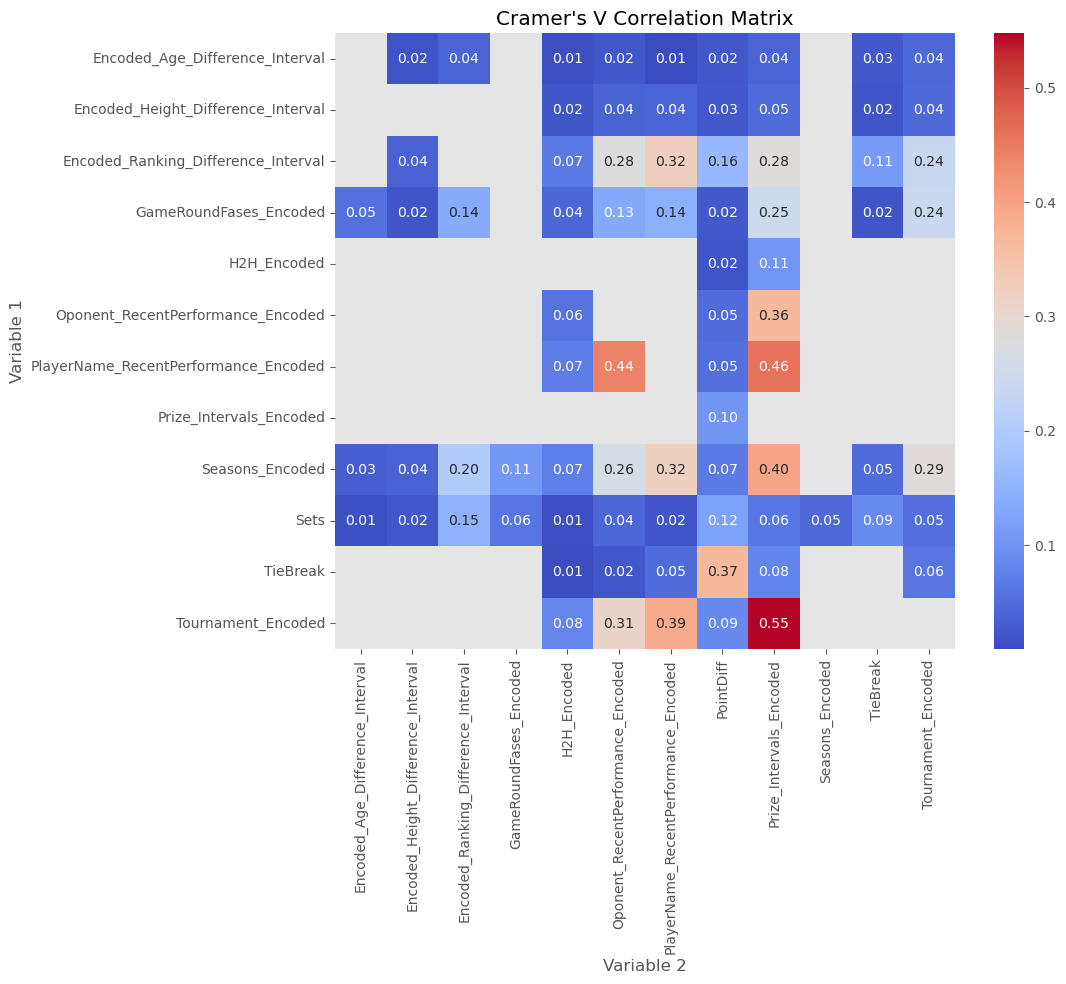

In [20]:
categorical_cols = ['Sets', 
                    'Seasons_Encoded', 
                    'GameRoundFases_Encoded',
                    'Encoded_Age_Difference_Interval',
                    'Encoded_Ranking_Difference_Interval',
                    'Encoded_Height_Difference_Interval', 
                    'TieBreak', 
                    'Tournament_Encoded',
                    'PlayerName_RecentPerformance_Encoded',
                    'Oponent_RecentPerformance_Encoded', 
                    'H2H_Encoded',
                    'Prize_Intervals_Encoded',
                    'PointDiff']

subset_df = df[categorical_cols]

cramer_v_values = []
for i in range(len(subset_df.columns)):
    for j in range(i+1, len(subset_df.columns)):
        contingency_table = pd.crosstab(subset_df.iloc[:, i], subset_df.iloc[:, j])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        phi = np.sqrt(chi2 / n)
        r, k = contingency_table.shape
        cramers_v = phi / np.sqrt(min(r - 1, k - 1))
        cramer_v_values.append((subset_df.columns[i], subset_df.columns[j], cramers_v))

cramer_v_df = pd.DataFrame(cramer_v_values, columns=['Variable 1', 'Variable 2', "Cramer's V"])
heatmap_data = cramer_v_df.pivot('Variable 1', 'Variable 2', "Cramer's V")
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Cramer's V Correlation Matrix")
plt.savefig('figs/corr_matrix_vcramer.png')
plt.show()

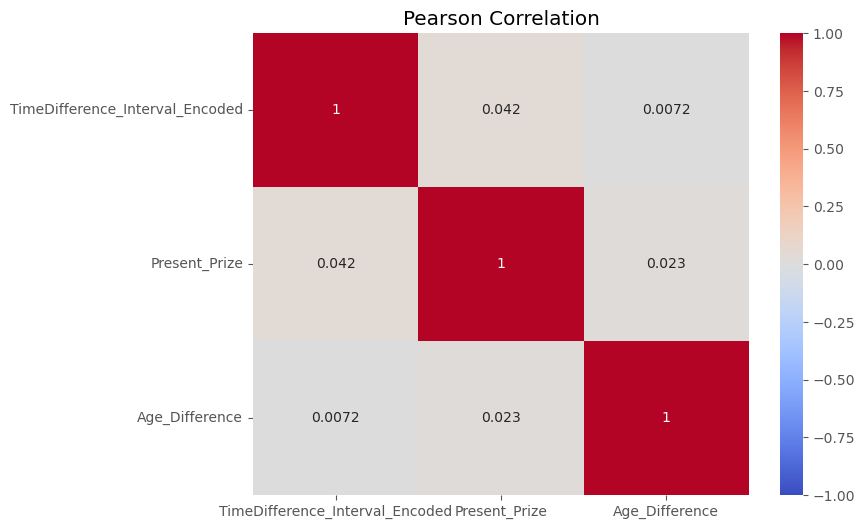

In [22]:
subset_df = df[['TimeDifference_Interval_Encoded', 
               'Present_Prize',
               'Age_Difference']]

correlation_matrix = subset_df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation")
plt.savefig('figs/corr_matrix_pearson.png')
plt.show()

## **Unbalanced Database**

Para ser possível observar a curva ROC teremos de converter a variável Sets para valores de 0 e 1:

In [9]:
# Map 'Sets' to binary values of 0 and 1
df['Sets'] = df['Sets'].map({2: 0, 3: 1})

### **Oversampling**

Oversampling is a technique used to increase the number of samples in the minority class (the less frequent class) to balance the class distribution. It involves randomly duplicating or generating new synthetic samples from the minority class until it reaches a desired balance with the majority class. Oversampling methods include Random Oversampling, Synthetic Minority Oversampling Technique (SMOTE), and Adaptive Synthetic Sampling (ADASYN).

#### Random Forest

Accuracy: 0.6337529504327302
Confusion Matrix:
[[1403  430]
 [ 501  208]]


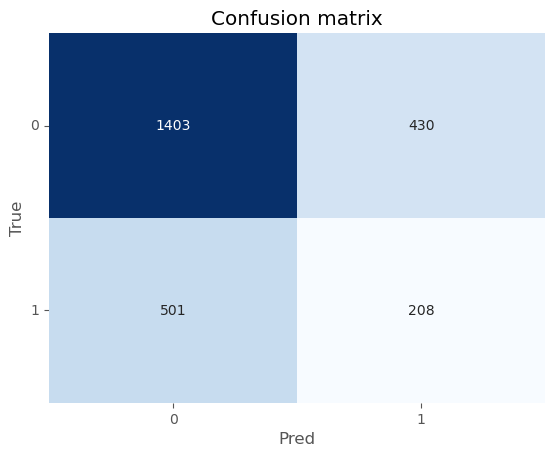

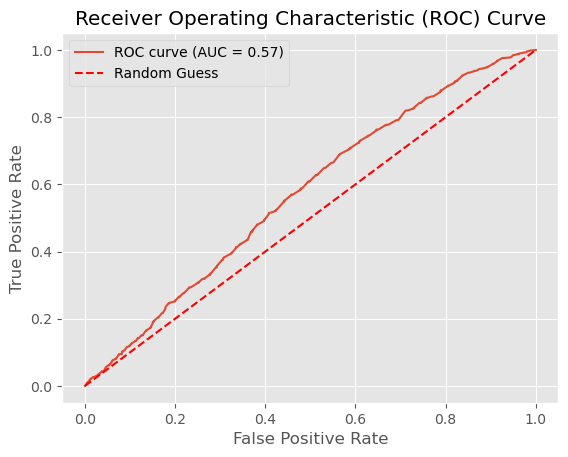

In [21]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier and fit the model on the oversampled training data
model = RandomForestClassifier()
model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_os_rf.png')
plt.show()

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_os_rf.png')
plt.show()

#### KNN

Accuracy: 0.6884343036978757
Confusion Matrix:
[[1630  203]
 [ 589  120]]


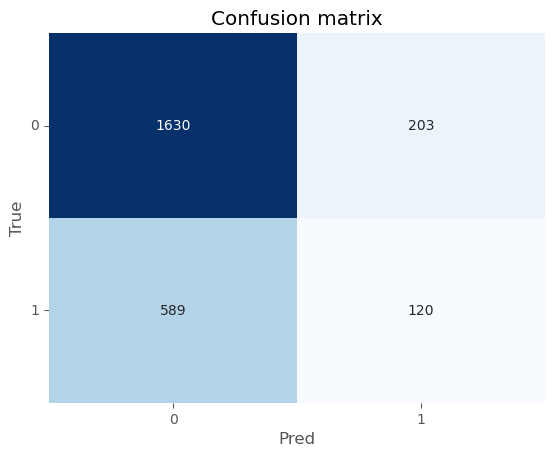

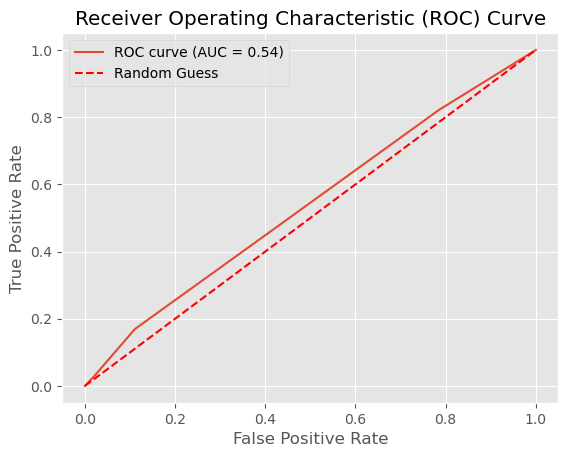

In [22]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_os_knn.png')
plt.show()

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_os_knn.png')
plt.show()

#### Naive Bayes

Accuracy: 0.7143981117230527
Confusion Matrix:
[[1790   43]
 [ 683   26]]


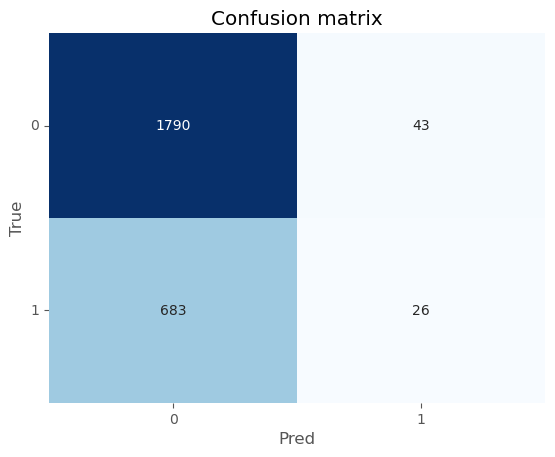

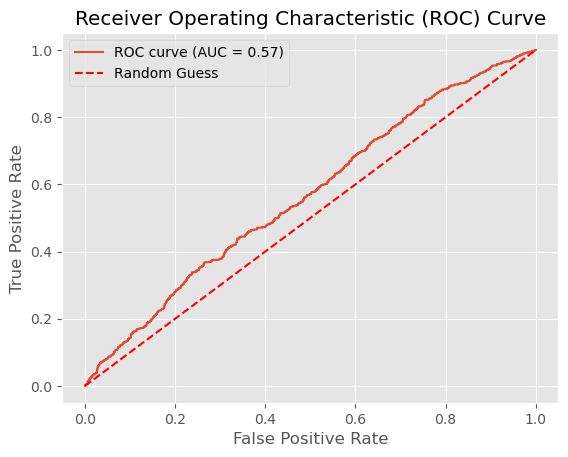

In [23]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_os_nb.png')
plt.show()

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_os_nb.png')
plt.show()

#### <span style="color:red">Logistic Regression</span>

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


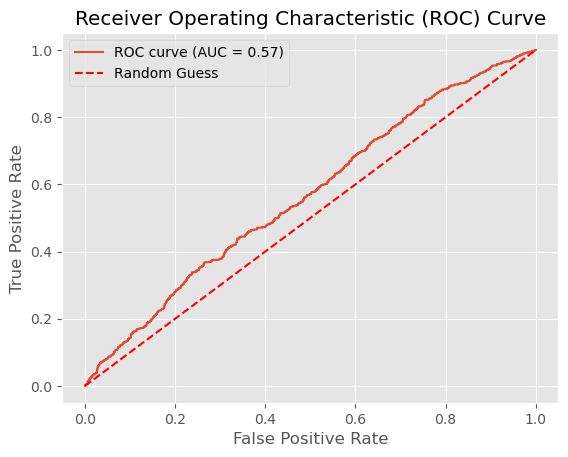

In [56]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### <span style="color:red">SVM</span>

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


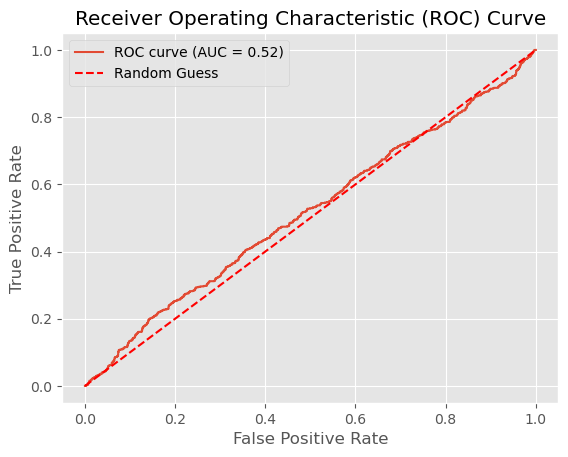

In [57]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the SVM model
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### **Undersampling**

Undersampling is a technique used to reduce the number of samples in the majority class (the more frequent class) to balance the class distribution. It involves randomly removing samples from the majority class until it reaches a desired balance with the minority class. Undersampling methods include Random Undersampling, Tomek Links, and Cluster Centroids.

#### Random Forest

Accuracy: 0.553501180173092
Confusion Matrix:
[[1000  833]
 [ 302  407]]


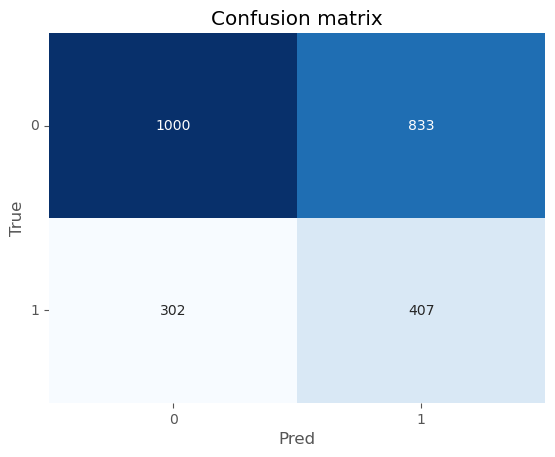

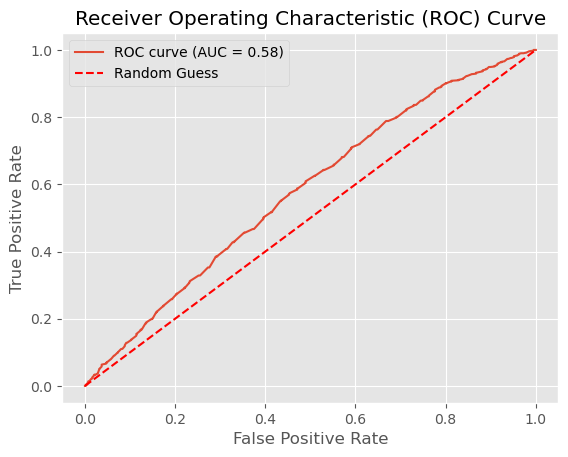

In [25]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create a Random Forest classifier and fit the model on the undersampled training data
model = RandomForestClassifier()
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_us_rf.png')
plt.show()

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_us_rf.png')
plt.show()

#### KNN

Accuracy: 0.6884343036978757
Confusion Matrix:
[[1630  203]
 [ 589  120]]


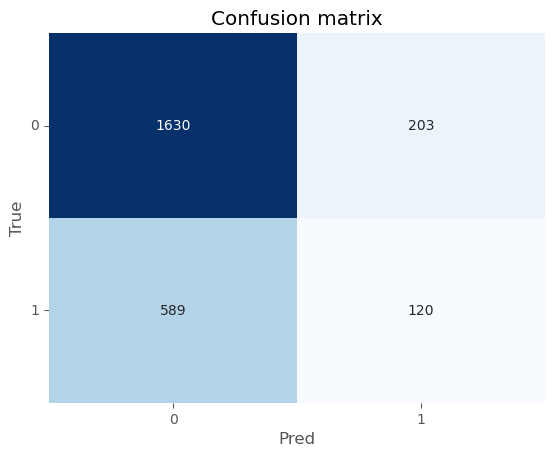

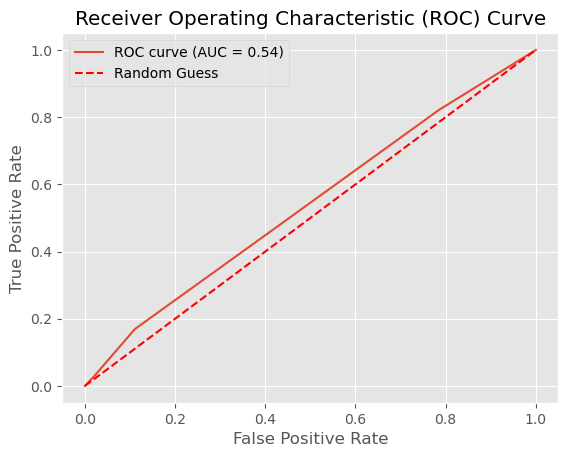

In [26]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_us_knn.png')
plt.show()

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_us_knn.png')
plt.show()

#### Naive Bayes

Accuracy: 0.7143981117230527
Confusion Matrix:
[[1790   43]
 [ 683   26]]


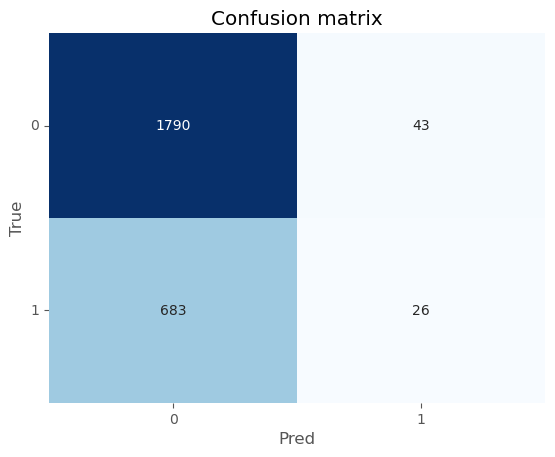

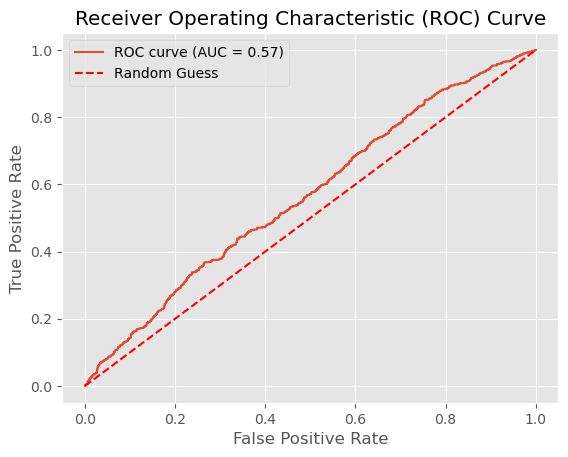

In [27]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_us_nb.png')
plt.show()

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_us_nb.png')
plt.show()

#### <span style="color:red">Logistic Regression</span>

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


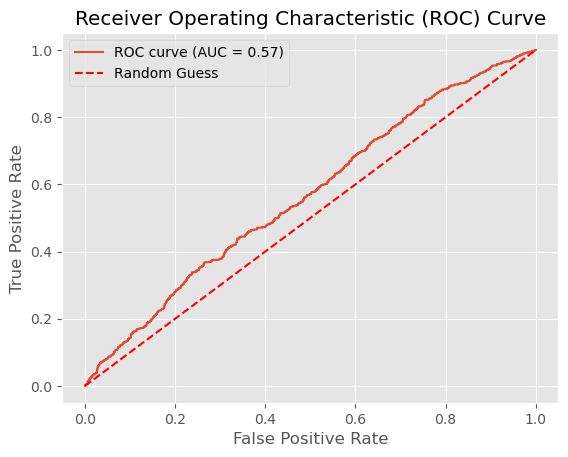

In [65]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### <span style="color:red">SVM</span>

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


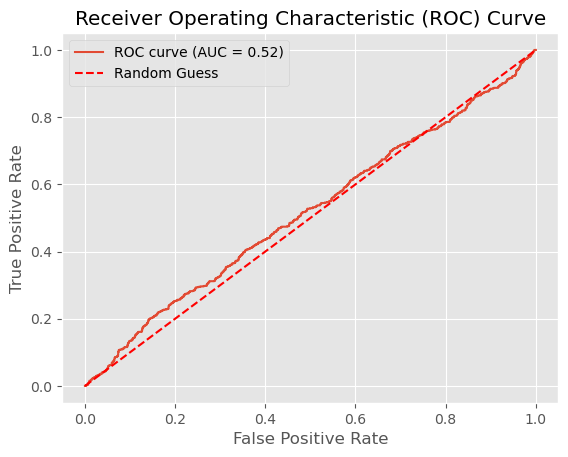

In [66]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the SVM model
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### **Stratified Sampling**

Stratified sampling is a sampling technique where the data is divided into subgroups (strata) based on the target variable's class labels. The goal is to ensure that each subgroup has a representative proportion of samples from each class. When splitting the data into training and testing sets, stratified sampling ensures that the class distribution is maintained in both sets.

#### Random Forest

Accuracy: 0.6896144767899292
Confusion Matrix:
[[1670  174]
 [ 615   83]]


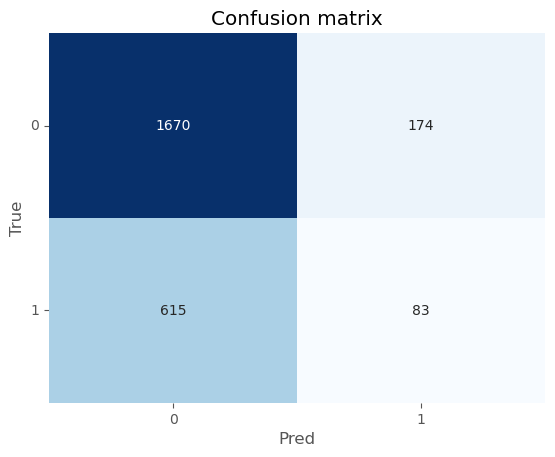

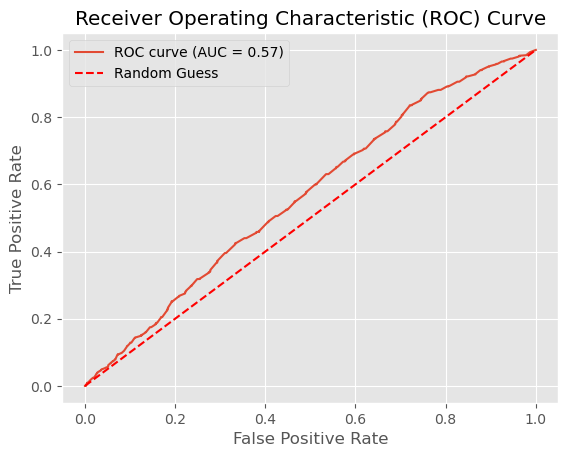

In [28]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create a Random Forest classifier and fit the model on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_ss_rf.png')
plt.show()

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_ss_rf.png')
plt.show()

#### KNN

Accuracy: 0.6762391817466562
Confusion Matrix:
[[1619  225]
 [ 598  100]]


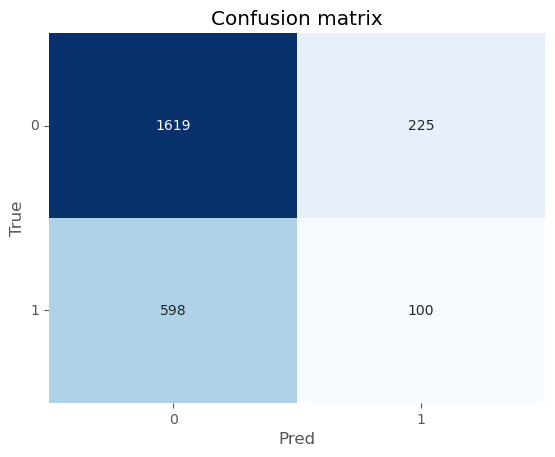

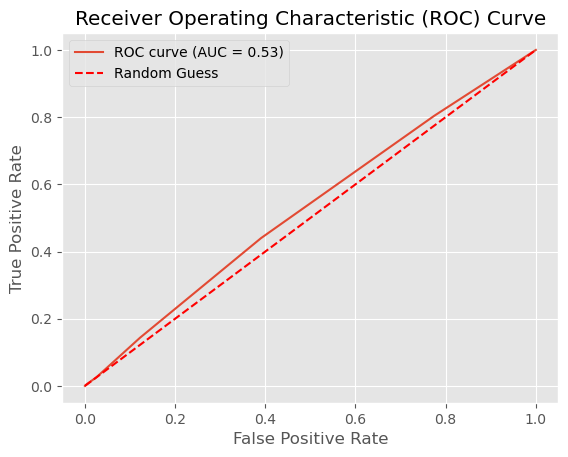

In [29]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_ss_knn.png')
plt.show()

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_ss_knn.png')
plt.show()

#### Naive Bayes

Accuracy: 0.7061369000786782
Confusion Matrix:
[[1760   84]
 [ 663   35]]


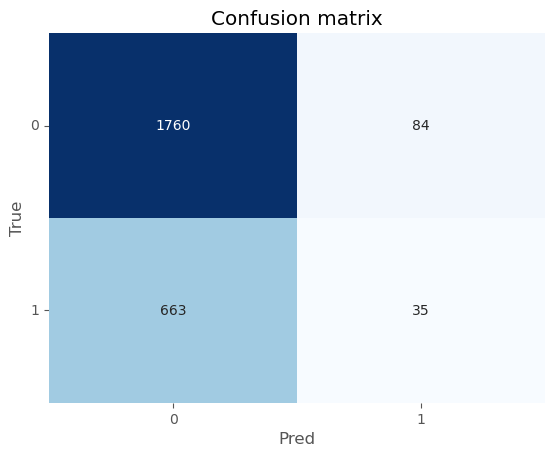

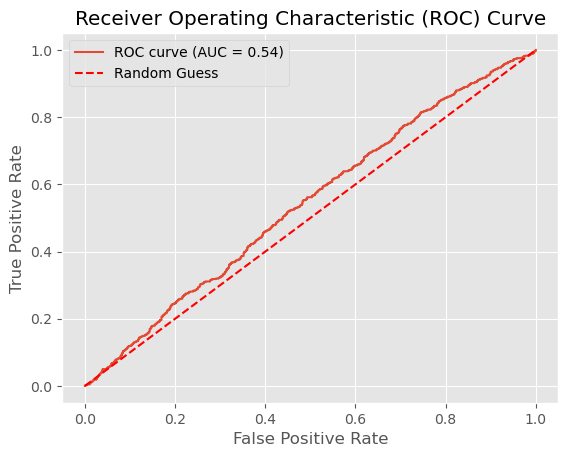

In [30]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_ss_nb.png')
plt.show()

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_ss_nb.png')
plt.show()

#### <span style="color:red">Logistic Regression</span>

Accuracy: 0.7254130605822188
Confusion Matrix:
[[1844    0]
 [ 698    0]]


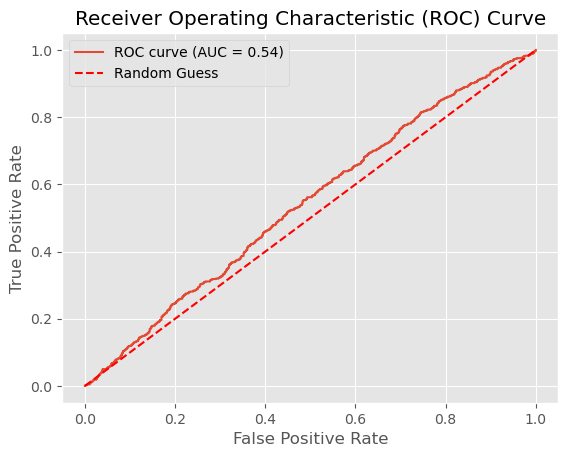

In [47]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### <span style="color:red">SVM</span>


Accuracy: 0.7254130605822188
Confusion Matrix:
[[1844    0]
 [ 698    0]]


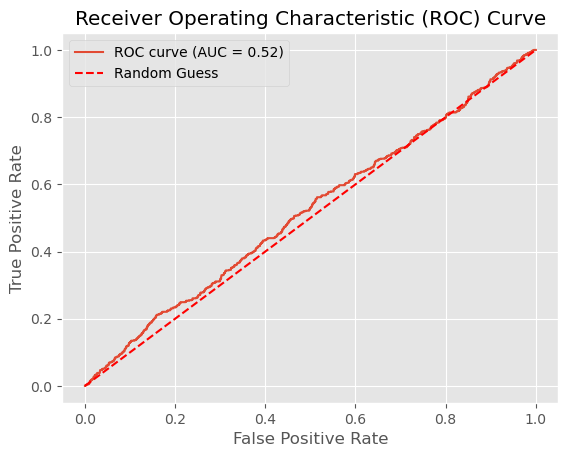

In [44]:
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create the SVM model
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## **Models**

Após serem analizadas as 3 estratégias, chegou-se à conclusão que a solução mais acertada seria a de usar Stratified Sampling.

Iremos então usar o stratified sampling e, testar diferentes variáveis no modelo, e tentar chegar a um modelo ótimo para a previsão dos sets.

### Models with Stratified Sampling

Observando os diferentes resultados, vão ser usados 3 modelos diferentes:
- Random Forest
- KNN
- Naive Bayes

In [10]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Random Forest

Accuracy: 0.6860739575137687
Confusion Matrix:
[[1660  184]
 [ 614   84]]


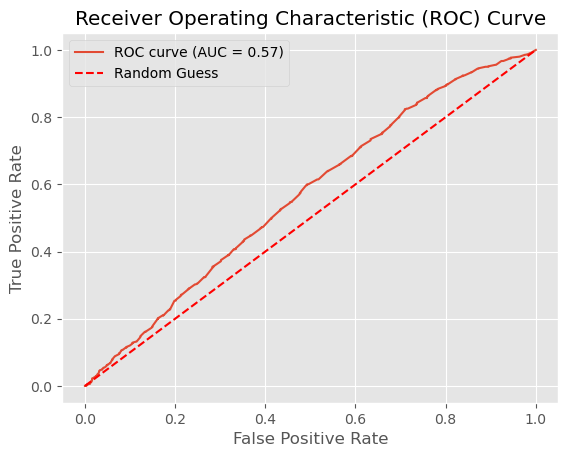

In [11]:
# Create a Random Forest classifier and fit the model on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### KNN

Accuracy: 0.6762391817466562
Confusion Matrix:
[[1619  225]
 [ 598  100]]


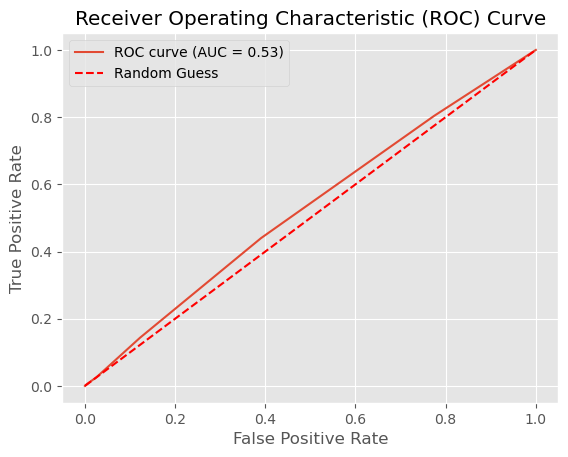

In [25]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Naive Bayes

Accuracy: 0.7061369000786782
Confusion Matrix:
[[1760   84]
 [ 663   35]]


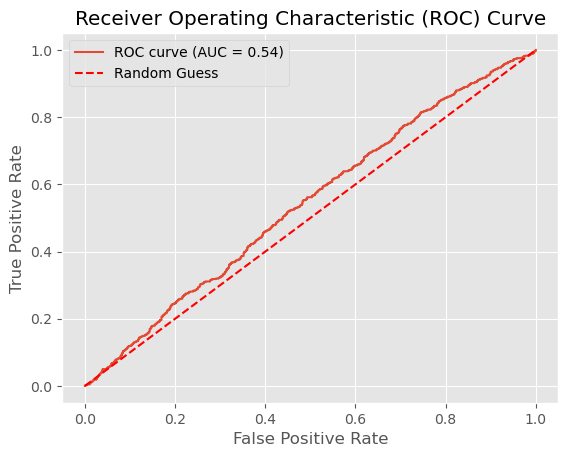

In [26]:
# Create the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Feature Importances

Para a escolha das variáveis certas é necessário perceber qual a importância que cada variável tem no modelo, e depois, escolher as variáveis que mais impactam o nosso modelo.

In [13]:
df.columns

Index(['Sets', 'Seasons_Encoded', 'GameRoundFases_Encoded',
       'Encoded_Age_Difference_Interval',
       'Encoded_Ranking_Difference_Interval',
       'Encoded_Height_Difference_Interval', 'TieBreak', 'Tournament_Encoded',
       'PlayerName_RecentPerformance_Encoded',
       'Oponent_RecentPerformance_Encoded', 'H2H_Encoded',
       'TimeDifference_Interval_Encoded', 'Present_Prize',
       'Prize_Intervals_Encoded', 'PointDiff', 'Age_Difference'],
      dtype='object')

Iremos então observar, para cada modelo, quais as variáveis que têm mais importância e testar esses modelos apenas com as variáveis mais relevantes.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Sets', axis=1)
y = df['Sets']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#### Calculate feature importances using **Logistic Regression**

Logistic regression is primarily used for classification problems. Despite its name, logistic regression is a classification algorithm rather than a regression algorithm. It is specifically designed for binary classification, where the goal is to predict the probability of an input sample belonging to a certain class.

In logistic regression, the output is a probability value between 0 and 1, which represents the likelihood of the input belonging to the positive class. It uses a logistic function (also known as the sigmoid function) to map the output of a linear model to the range [0, 1]. A threshold is then applied to the predicted probabilities to make the final binary classification decision.

While logistic regression is widely used for binary classification, it can also be extended to handle multi-class classification problems using techniques such as one-vs-rest or softmax regression.

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                               Attribute  Importance
3    Encoded_Ranking_Difference_Interval    0.178666
12               Prize_Intervals_Encoded    0.116004
5                               TieBreak    0.086660
10       TimeDifference_Interval_Encoded    0.066049
8      Oponent_RecentPerformance_Encoded    0.044078
6                     Tournament_Encoded    0.027626
11                         Present_Prize    0.019322
14                        Age_Difference    0.016674
2        Encoded_Age_Difference_Interval   -0.006170
0                        Seasons_Encoded   -0.007127
9                            H2H_Encoded   -0.007794
4     Encoded_Height_Difference_Interval   -0.028291
7   PlayerName_RecentPerformance_Encoded   -0.070089
1                 GameRoundFases_Encoded   -0.072850
13                             PointDiff   -0.240261


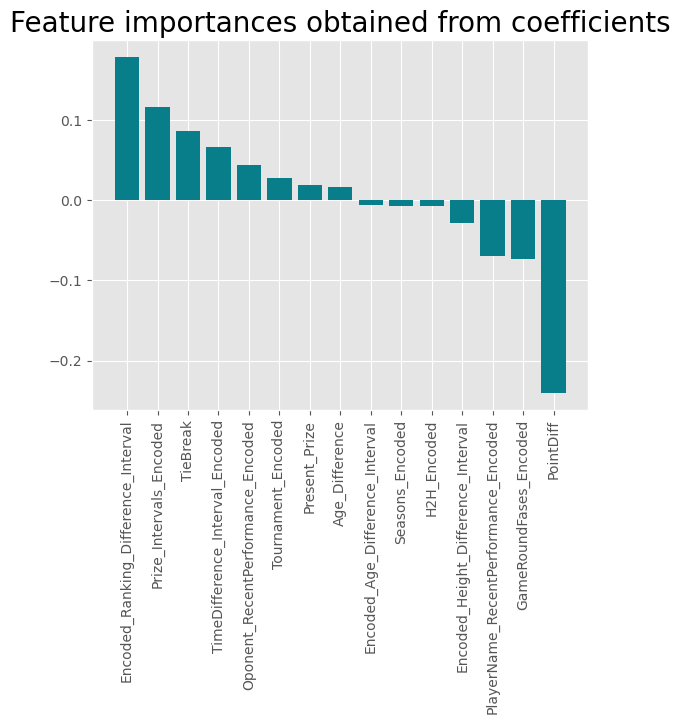

In [24]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Calculate feature importances using **Tree Based Model**

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                               Attribute  Importance
13                             PointDiff    0.108941
3    Encoded_Ranking_Difference_Interval    0.096790
12               Prize_Intervals_Encoded    0.086076
8      Oponent_RecentPerformance_Encoded    0.066441
10       TimeDifference_Interval_Encoded    0.061902
5                               TieBreak    0.061882
9                            H2H_Encoded    0.061860
2        Encoded_Age_Difference_Interval    0.060752
6                     Tournament_Encoded    0.059704
1                 GameRoundFases_Encoded    0.059150
11                         Present_Prize    0.056179
4     Encoded_Height_Difference_Interval    0.055886
0                        Seasons_Encoded    0.055299
7   PlayerName_RecentPerformance_Encoded    0.055240
14                        Age_Difference    0.053898


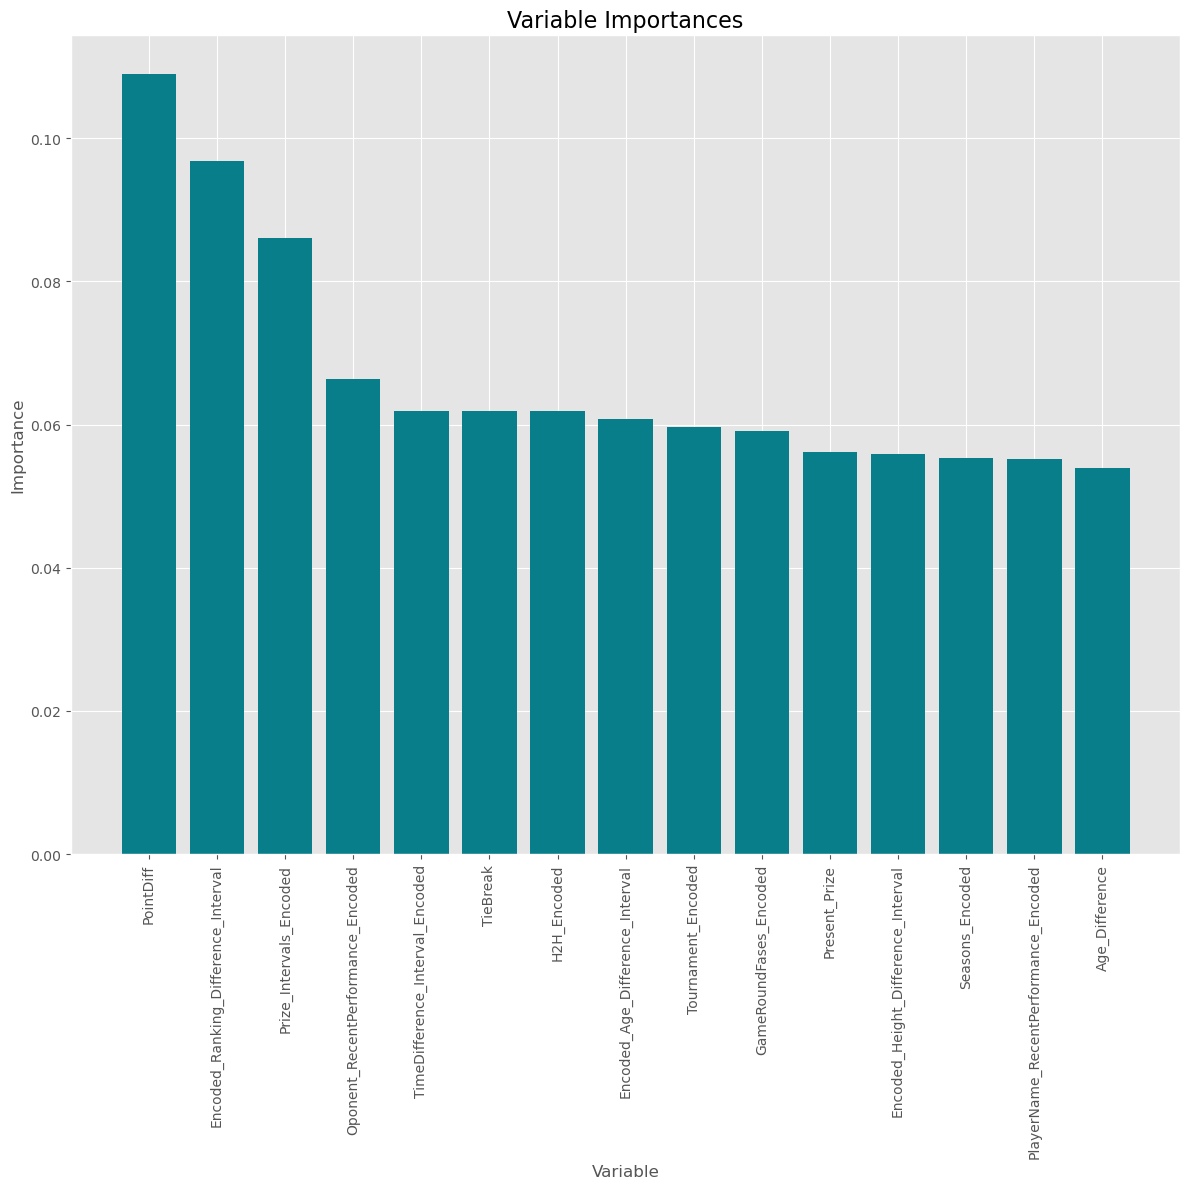

In [47]:
plt.figure(figsize=(12, 12))  # Adjust the figure size

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Variable Importances', size=16)
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')

plt.tight_layout()  # Adjust the layout to prevent overlapping labels

plt.savefig('figs/var_importances.png', dpi=300)  # Save the figure with higher dpi for better resolution

plt.show()

### Testing the model

Primeiro foram criadas as 2 bases de dados:  
**df_b1set** - antes do primeiro set  
**df_a1set** - depois do primeiro set

In [12]:
df_b1set = df[['Sets', 
            'Encoded_Ranking_Difference_Interval',
            'Prize_Intervals_Encoded',
            'Oponent_RecentPerformance_Encoded',
            'TimeDifference_Interval_Encoded',
            'H2H_Encoded']]
df_b1set.shape

(12708, 6)

In [13]:
df_a1set = df[['Sets', 
            'PointDiff',
            'Encoded_Ranking_Difference_Interval',
            'Prize_Intervals_Encoded',
            'Oponent_RecentPerformance_Encoded',
            'TimeDifference_Interval_Encoded',
            'TieBreak',
            'H2H_Encoded']]
df_a1set.shape

(12708, 8)

#### Model before 1st set

Accuracy: 0.7222659323367427


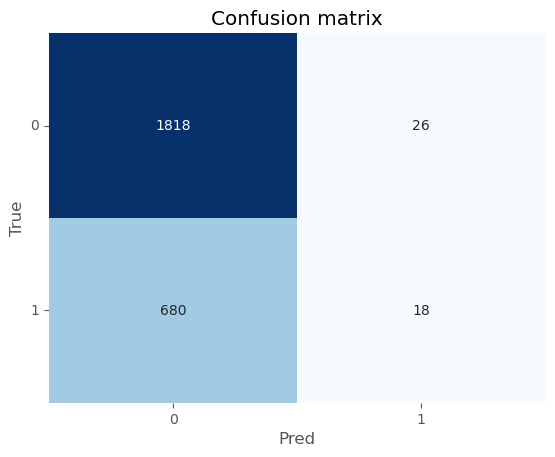

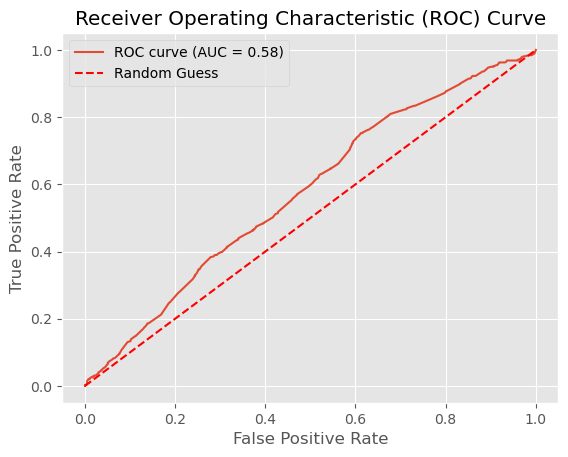

In [14]:
X = df_b1set.drop('Sets', axis=1)
y = df_b1set['Sets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Create a Random Forest classifier and fit the model on the training data
model_b1set = RandomForestClassifier()
model_b1set.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_b1set.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

'''
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
'''

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_b1set.png')
plt.show()

y_pred_proba = model_b1set.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_b1set.png')
plt.show()

In [15]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.72
Auc: 0.58
Recall (all 1s predicted right): 0.03
Precision (confidence when predicting a 1): 0.41
Detail:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1844
           1       0.41      0.03      0.05       698

    accuracy                           0.72      2542
   macro avg       0.57      0.51      0.44      2542
weighted avg       0.64      0.72      0.62      2542



#### Model after 1st set

Accuracy: 0.7120377655389457


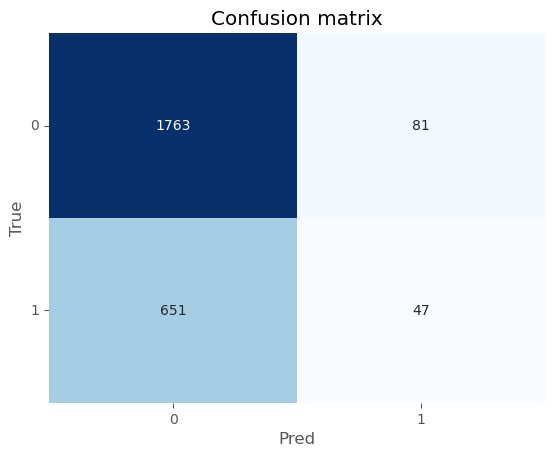

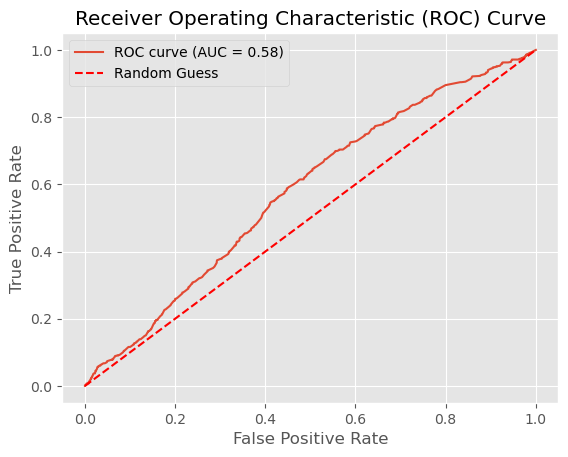

In [16]:
X = df_a1set.drop('Sets', axis=1)
y = df_a1set['Sets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Create a Random Forest classifier and fit the model on the training data
model_a1set = RandomForestClassifier()
model_a1set.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_a1set.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

'''
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
'''

# confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.savefig('figs/conf_matrix_model_a1set.png')
plt.show()

y_pred_proba = model_a1set.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('figs/roc_curve_model_a1set.png')
plt.show()

In [17]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.71
Auc: 0.58
Recall (all 1s predicted right): 0.07
Precision (confidence when predicting a 1): 0.37
Detail:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83      1844
           1       0.37      0.07      0.11       698

    accuracy                           0.71      2542
   macro avg       0.55      0.51      0.47      2542
weighted avg       0.63      0.71      0.63      2542



## Visualizations

In [16]:
variables_important = ['PointDiff','Encoded_Ranking_Difference_Interval','Prize_Intervals_Encoded']

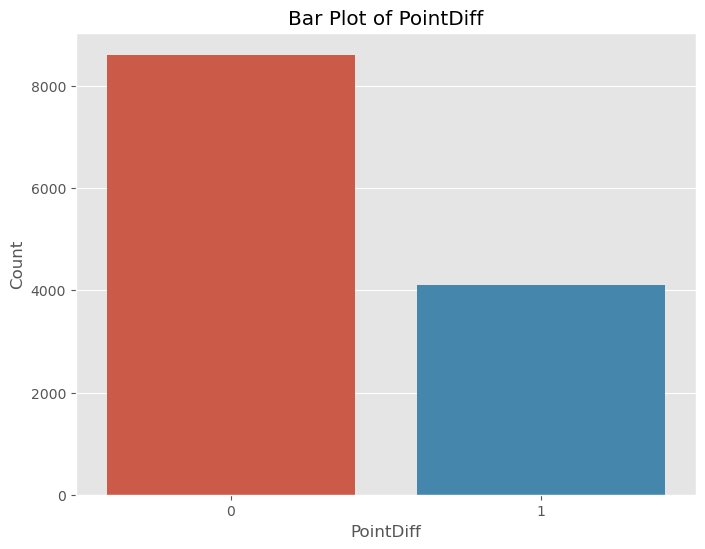

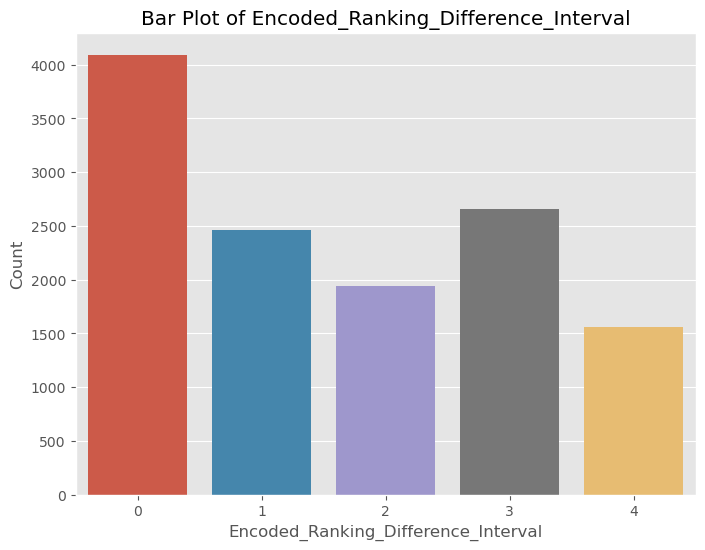

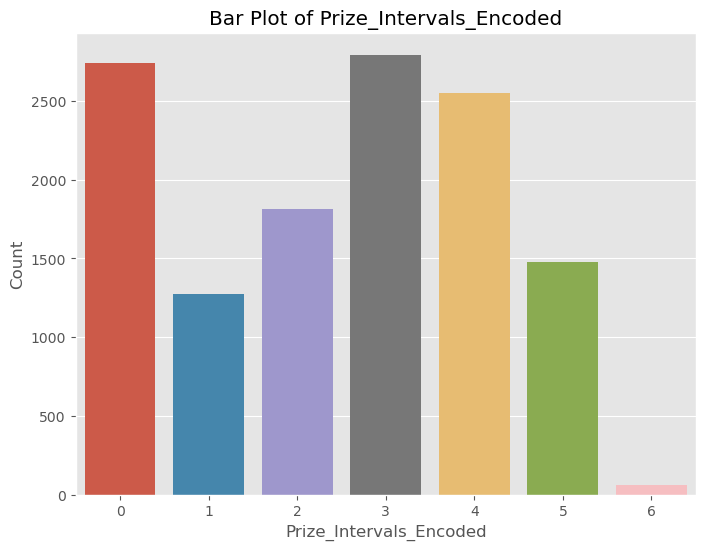

In [17]:
for var in variables_important:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[var])
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.savefig(str('barplot_' + var + '.png'))
    plt.show()

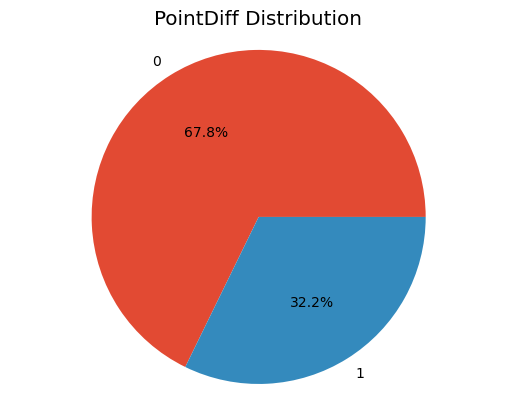

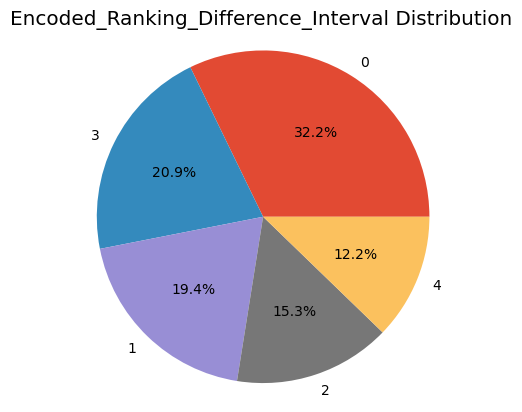

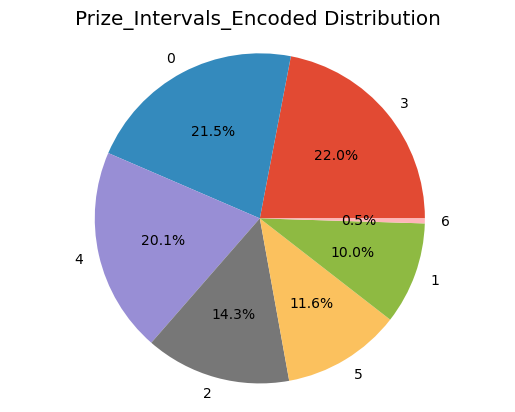

In [20]:
pd_counts = df['PointDiff'].value_counts()

plt.pie(pd_counts, labels=pd_counts.index, autopct='%1.1f%%')
plt.title('PointDiff Distribution')
plt.axis('equal')
plt.savefig('piechart_PointDiff.png')
plt.show()

erdi_counts = df['Encoded_Ranking_Difference_Interval'].value_counts()

plt.pie(erdi_counts, labels=erdi_counts.index, autopct='%1.1f%%')
plt.title('Encoded_Ranking_Difference_Interval Distribution')
plt.axis('equal')
plt.savefig('piechart_Encoded_Ranking_Difference_Interval.png')
plt.show()

pie_counts = df['Prize_Intervals_Encoded'].value_counts()

plt.pie(pie_counts, labels=pie_counts.index, autopct='%1.1f%%')
plt.title('Prize_Intervals_Encoded Distribution')
plt.axis('equal')
plt.savefig('piechart_Prize_Intervals_Encoded.png')
plt.show()